In [39]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report, r2_score
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [40]:
df = pd.read_csv('df_feature_engineering.csv')

# Data prep

In [41]:
df_target = df['Rain Tomorrow']

df_inputs = df.drop(columns = ['Rain Tomorrow'])
df

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,Rain Today,Rain Tomorrow
0,5.9,20.0,5.4,8.388787,39.0,52.0,31.0,3.0,2.0,18.9,1,0
1,4.0,20.0,0.2,5.923032,17.0,98.0,58.0,6.0,5.0,17.8,0,0
2,20.3,38.4,3.6,6.500000,39.0,50.0,18.0,7.0,6.0,37.4,1,0
3,19.4,21.6,0.0,8.275429,43.0,69.0,63.0,5.0,5.0,19.9,0,0
4,11.4,22.6,0.0,2.500000,28.0,73.0,57.0,4.0,8.0,21.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
60331,24.8,39.8,0.4,9.703550,65.0,38.0,24.0,2.0,3.0,36.6,0,1
60332,19.3,24.4,0.0,3.985550,35.0,28.0,91.0,8.0,8.0,18.5,0,1
60333,15.2,21.5,6.8,3.985550,30.0,65.0,65.0,3.0,8.0,21.2,1,1
60334,17.7,26.9,12.6,3.985550,35.0,93.0,59.0,7.0,8.0,26.0,1,1


In [42]:
seed = 0

# Split into training+validation and testing sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(df_inputs.values, df_target.values, test_size=0.1, random_state=42)
# Split training+validation set into training and validation sets (Of the 80% for training and validation, 90*0.21 = 12% is validation and 68% is training )
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.21, random_state=42)

In [43]:
X_train.shape, X_test.shape, X_val.shape

((42898, 11), (6034, 11), (11404, 11))

In [44]:
y_train.shape, y_test.shape, y_val.shape

((42898,), (6034,), (11404,))

# Neural network

Binary Crossentropy is used for binary classification problems. 
It measures the difference between two probability distributions: the true distribution and the predicted distribution.


In [17]:
# Build a simple neural network model
model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Epoch 1/20


/home/acr/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1341/1341 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6691 - loss: 0.8698 - val_accuracy: 0.7583 - val_loss: 0.4986
Epoch 2/20
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7548 - loss: 0.5000 - val_accuracy: 0.7595 - val_loss: 0.4953
Epoch 3/20
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7592 - loss: 0.4973 - val_accuracy: 0.7637 - val_loss: 0.4872
Epoch 4/20
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7565 - loss: 0.4958 - val_accuracy: 0.7626 - val_loss: 0.4859
Epoch 5/20
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7632 - loss: 0.4862 - val_accuracy: 0.7573 - val_loss: 0.4974
Epoch 6/20
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7635 - loss: 0.4869 - val_accuracy: 0.7651 - val_loss: 0.4848
Epoch 7/20
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7657 - loss: 0.4822 - val_accuracy: 0.7623 - val_loss: 0.4856
Epoch 8/20
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7671 - loss: 0.4819 - val_accurac

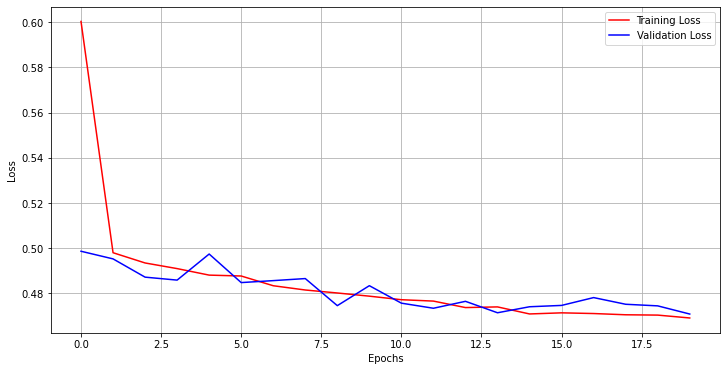

In [18]:
#Creation of the loss plot

losses = pd.DataFrame(data = {
    'epoch': [i for i in history.epoch],
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss']
})
losses = losses.groupby(by = 'epoch').mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(losses.epoch, losses.loss, 'red', label = 'Training Loss')
plt.plot(losses.epoch, losses.val_loss, 'blue', label = 'Validation Loss')
plt.grid()
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [45]:
# Neural network model
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='leaky_relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='leaky_relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=5e-6)
early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=40,restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=2000, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

/home/acr/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6333 - loss: 0.8298 - val_accuracy: 0.7489 - val_loss: 0.5102 - learning_rate: 0.0010
Epoch 2/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7427 - loss: 0.5293 - val_accuracy: 0.7541 - val_loss: 0.5019 - learning_rate: 0.0010
Epoch 3/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7522 - loss: 0.5134 - val_accuracy: 0.7460 - val_loss: 0.5002 - learning_rate: 0.0010
Epoch 4/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7536 - loss: 0.5063 - val_accuracy: 0.7603 - val_loss: 0.4887 - learning_rate: 0.0010
Epoch 5/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7577 - loss: 0.4988 - val_accuracy: 0.7620 - val_loss: 0.4847 - learning_rate: 0.0010
Epoch 6/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7609 - loss: 0.4934 - val_accuracy: 0.7618 - val_loss: 0.4889 - learning_rate: 0.0010
Epoch 7/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7

336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7740 - loss: 0.4691 - val_accuracy: 0.7722 - val_loss: 0.4678 - learning_rate: 2.0000e-04
Epoch 45/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7719 - loss: 0.4744 - val_accuracy: 0.7752 - val_loss: 0.4686 - learning_rate: 2.0000e-04
Epoch 46/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7725 - loss: 0.4725 - val_accuracy: 0.7738 - val_loss: 0.4691 - learning_rate: 2.0000e-04
Epoch 47/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7756 - loss: 0.4678 - val_accuracy: 0.7749 - val_loss: 0.4663 - learning_rate: 2.0000e-04
Epoch 48/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7729 - loss: 0.4677 - val_accuracy: 0.7739 - val_loss: 0.4658 - learning_rate: 2.0000e-04
Epoch 49/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7760 - loss: 0.4683 - val_accuracy: 0.7737 - val_loss: 0.4673 - learning_rate: 2.0000e-04
Epoch 50/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step 

336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7717 - loss: 0.4686 - val_accuracy: 0.7752 - val_loss: 0.4653 - learning_rate: 5.0000e-06
Epoch 87/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7769 - loss: 0.4636 - val_accuracy: 0.7754 - val_loss: 0.4650 - learning_rate: 5.0000e-06
Epoch 88/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7788 - loss: 0.4640 - val_accuracy: 0.7753 - val_loss: 0.4649 - learning_rate: 5.0000e-06
Epoch 89/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7757 - loss: 0.4675 - val_accuracy: 0.7751 - val_loss: 0.4650 - learning_rate: 5.0000e-06
Epoch 90/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7753 - loss: 0.4653 - val_accuracy: 0.7752 - val_loss: 0.4651 - learning_rate: 5.0000e-06
Epoch 91/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7735 - loss: 0.4667 - val_accuracy: 0.7746 - val_loss: 0.4652 - learning_rate: 5.0000e-06
Epoch 92/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/ste

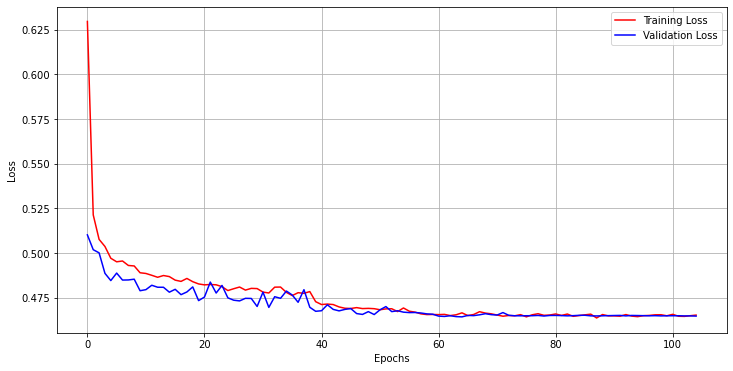

In [46]:
#Creation of the loss plot

losses = pd.DataFrame(data = {
    'epoch': [i for i in history.epoch],
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss']
})
losses = losses.groupby(by = 'epoch').mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(losses.epoch, losses.loss, 'red', label = 'Training Loss')
plt.plot(losses.epoch, losses.val_loss, 'blue', label = 'Validation Loss')
plt.grid()
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [47]:
model.save("NN_feat_eng.keras")

# Scaled data

In [48]:
transformer = MinMaxScaler().fit(df_inputs)

x_scaled = pd.DataFrame(transformer.transform(df_inputs), columns = df_inputs.columns)
y_scaled = df_target

# Split into training+validation and testing sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(x_scaled.values, y_scaled.values, test_size=0.1, random_state=42)
# Split training+validation set into training and validation sets (Of the 80% for training and validation, 90*0.21 = 12% is validation and 68% is training )
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.21, random_state=42)

In [49]:
# Neural network model
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=8, min_lr=5e-6)
early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=40,restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=2000, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Epoch 1/2000


/home/acr/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


336/336 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7177 - loss: 0.5618 - val_accuracy: 0.7653 - val_loss: 0.4822 - learning_rate: 0.0010
Epoch 2/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7660 - loss: 0.4894 - val_accuracy: 0.7682 - val_loss: 0.4806 - learning_rate: 0.0010
Epoch 3/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7653 - loss: 0.4839 - val_accuracy: 0.7717 - val_loss: 0.4699 - learning_rate: 0.0010
Epoch 4/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7692 - loss: 0.4776 - val_accuracy: 0.7678 - val_loss: 0.4739 - learning_rate: 0.0010
Epoch 5/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7703 - loss: 0.4776 - val_accuracy: 0.7719 - val_loss: 0.4693 - learning_rate: 0.0010
Epoch 6/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7751 - loss: 0.4727 - val_accuracy: 0.7718 - val_loss: 0.4689 - learning_rate: 0.0010
Epoch 7/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7726 - loss: 0

Epoch 44/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7824 - loss: 0.4570 - val_accuracy: 0.7785 - val_loss: 0.4612 - learning_rate: 2.0000e-04
Epoch 45/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7882 - loss: 0.4506 - val_accuracy: 0.7788 - val_loss: 0.4612 - learning_rate: 2.0000e-04
Epoch 46/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7831 - loss: 0.4555 - val_accuracy: 0.7791 - val_loss: 0.4610 - learning_rate: 4.0000e-05
Epoch 47/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7832 - loss: 0.4552 - val_accuracy: 0.7803 - val_loss: 0.4608 - learning_rate: 4.0000e-05
Epoch 48/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7858 - loss: 0.4553 - val_accuracy: 0.7801 - val_loss: 0.4610 - learning_rate: 4.0000e-05
Epoch 49/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7824 - loss: 0.4590 - val_accuracy: 0.7801 - val_loss: 0.4609 - learning_rate: 4.0000e-05
Epoch 50/2000
336/336 ━━━━━━━━━━━━━━━━━━

336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7853 - loss: 0.4530 - val_accuracy: 0.7791 - val_loss: 0.4611 - learning_rate: 5.0000e-06
Epoch 87/2000
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7820 - loss: 0.4566 - val_accuracy: 0.7791 - val_loss: 0.4611 - learning_rate: 5.0000e-06
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7658 - loss: 0.4678
Test loss: 0.46607881784439087
Test accuracy: 0.7688100934028625


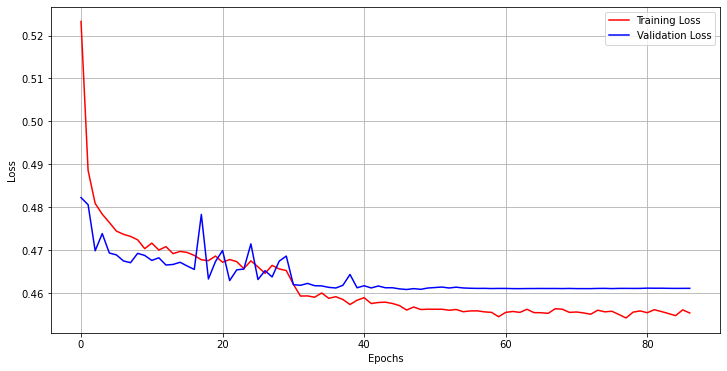

In [50]:
#Creation of the loss plot

losses = pd.DataFrame(data = {
    'epoch': [i for i in history.epoch],
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss']
})
losses = losses.groupby(by = 'epoch').mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(losses.epoch, losses.loss, 'red', label = 'Training Loss')
plt.plot(losses.epoch, losses.val_loss, 'blue', label = 'Validation Loss')
plt.grid()
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [51]:
model.save("NN_feat_eng_scaled.keras")